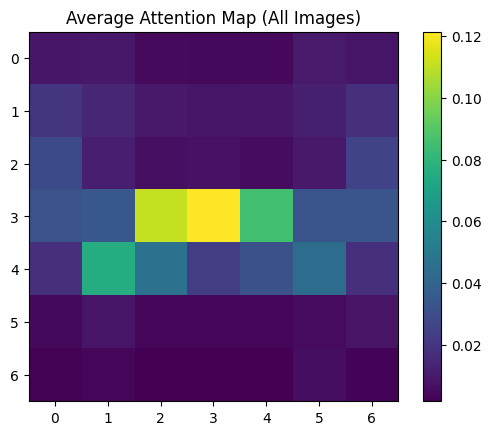

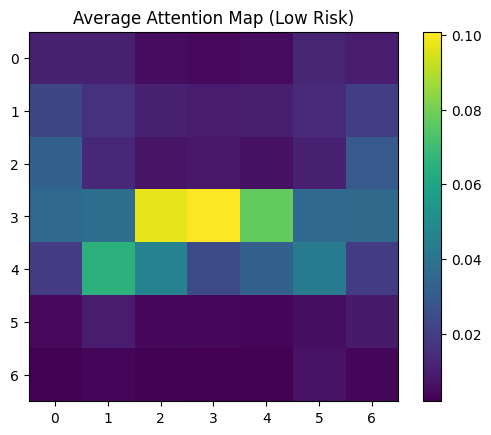

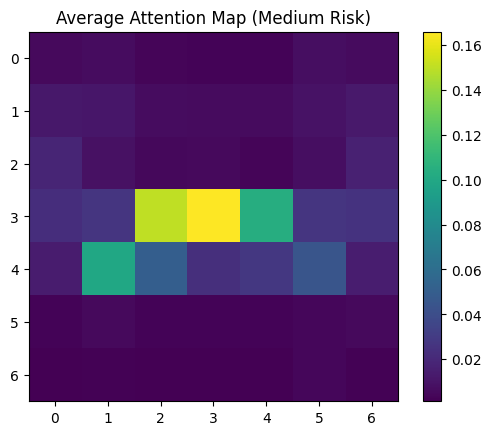

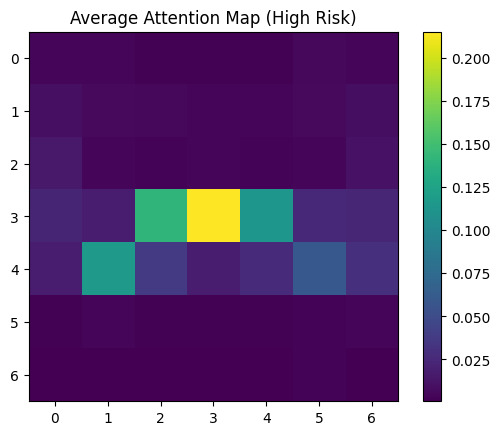

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def show_average_attention_maps(csv_path, original_image_shape, cutoff_low, cutoff_mid):
    # Load the CSV file
    data = pd.read_csv(csv_path)

    # Initialize lists to store attention maps
    attention_maps_low = []
    attention_maps_mid = []
    attention_maps_high = []
    all_attention_maps = []

    for _, row in data.iterrows():
        # Extract attention map and reshape
        attention_map = np.array([row[f'att_{i}'] for i in range(original_image_shape[0] * original_image_shape[1])])
        attention_map = attention_map.reshape(original_image_shape)

        # Mirror flip if SIDE = 2
        if row['SIDE'] == 1:
            attention_map = np.fliplr(attention_map)

        # Append to all attention maps list
        all_attention_maps.append(attention_map)

        # Categorize based on y_pred
        if row['y_pred'] < cutoff_low:
            attention_maps_low.append(attention_map)
        elif row['y_pred'] < cutoff_mid:
            attention_maps_mid.append(attention_map)
        else:
            attention_maps_high.append(attention_map)

    # Function to calculate and display average attention map
    def display_average_map(attention_maps, title):
        if attention_maps:
            avg_map = np.mean(attention_maps, axis=0)
            plt.imshow(avg_map, cmap='viridis')
            plt.colorbar()
            plt.title(title)
            plt.show()
        else:
            print(f"No data for {title}")
            
    # Display average attention maps for each category and overall
    display_average_map(all_attention_maps, "Average Attention Map (All Images)")
    display_average_map(attention_maps_low, "Average Attention Map (Low Risk)")
    display_average_map(attention_maps_mid, "Average Attention Map (Medium Risk)")
    display_average_map(attention_maps_high, "Average Attention Map (High Risk)")

    
cutoff_low= 0.253282368183136
cutoff_mid= 1.3440890312194824
show_average_attention_maps(r'/home/jts0926/OAI_att_7_testonly.csv', [7, 7], cutoff_low, cutoff_mid)